Nama: Gisella Vania Dwipayana

Participant ID: DS04042

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [23]:
!pip install dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
!gdown 1LrCqcbr-rg-e5KA0y-XxcFBkdAFG0z0o

Downloading...
From: https://drive.google.com/uc?id=1LrCqcbr-rg-e5KA0y-XxcFBkdAFG0z0o
To: /content/heart.csv
100% 38.1k/38.1k [00:00<00:00, 71.0MB/s]


# Jawaban Soal 1:

1) Business Problem

Kita ingin memprediksi atau mengklasifikasi apakah pasien memiliki penyakit jantung atau tidak.

2) Metrics

Adapun dalam kasus ini yang berperan sebagai metrics adalah fitur-fitur yang ada pada dataset ini selain fitur target, yaitu fitur-fitur input:
- age: umur pasien (dalam satuan tahun)
- sex: jenis kelamin pasien (1 jika pria, 0 jika wanita)
- cp: jenis nyeri dada atau chest pain yang dialami pasien (Value 0: typical angina, Value 1: atypical angina, Value 2: non-anginal pain, Value 3: asymptomatic)
- trestbps: tekanan darah istirahat (dalam satuan mm Hg)
- chol: serum cholestoral dalam satuan mg/dl
- fbs: (gula darah puasa > 120 mg/dl) (1 = true; 0 = false)
- restecg: hasil elektrokardiografi saat istirahat (Value 0: normal, Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria)
- thalach: detak jantung maksimum yang tercapai
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak = Depresi ST yang diinduksi oleh olahraga relatif terhadap istirahat
- slope: kemiringan segmen ST saat puncak olahraga (Value 0: menaik, Value 1: datar, Value 2: menurun)
- ca: jumlah pembuluh utama (0-3) diwarnai oleh flourosopy
- thal: 1 = normal; 2 = fixed defect; 3 = reversable defect

3) Goals

Mengklasifikasikan mana saja pasien yang memiliki penyakit jantung atau tidak, dimana fitur "target" menyimpan value keberadaan penyakit jantung pada pasien (valuenya 0 jika tidak memiliki penyakit jantung, dan 1 jika memiliki penyakit jantung), fitur ini juga merupakan fitur target dari klasifikasi yang akan dilakukan.







# Jawaban Soal 2:
Workflow yang akan saya gunakan jika saya seorang data 
scientist yang bekerja dalam kasus ini:

1) Data Collecting

Tahap ini sudah  dilalui dengan menggunakan data yang telah dikumpulkan atau disediakan pada kaggle, yaitu Heart Disease Dataset

2) Data Cleaning

Melakukan data pre-processing, seperti mendeteksi dan menangani missing values, menghapus data duplikat atau data yang tidak dibutuhkan, memfilter outlier yang tidak diinginkan, mendeteksi apakah data balance atau imbalance.

3) EDA

Exploratory Data Analysis mencakup melihat attributes,
univariate/bivariate/multivariate analysis, melihat missing value, melihat
outliers, sebelum akhirnya melakukan feature engineering dan melihat
insights yang ada dari data tersebut.

4) Model

Membuat model machine learning untuk melakukan binary classification, melatih model, melakukan testing, dan evaluasi model.


# Jawaban Soal 3: Check quality of the dataset

In [25]:
# import data
data = pd.read_csv('heart.csv')

In [26]:
# cek head dari data
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [28]:
# cek missing values
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [29]:
# Menghapus data duplikat
data = data.drop_duplicates(keep='first')

In [30]:
# cek apakah masih terdapat data duplikat
data.duplicated().any()

False

<Axes: >

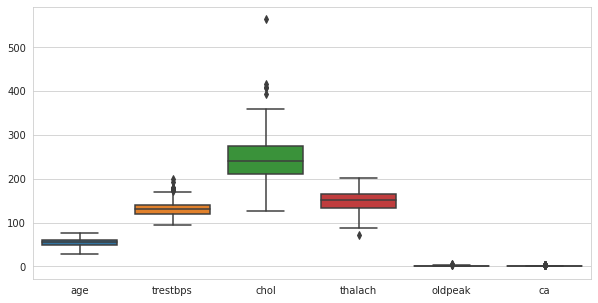

In [31]:
# menampilkan boxplot dari fitur-fitur numerik untuk mengecek outlier
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.boxplot(data=data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']])

Terlihat dari boxplot diatas bahwa terdapat outlier pada dataset yang digunakan

In [32]:
# Menghapus outliers
def outliers(data, fitur):
  Q1 = data[fitur].quantile(0.25)
  Q3 = data[fitur].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  ls = data.index[(data[fitur] < lower_bound) | (data[fitur] > upper_bound)]
  return ls

index_list = []
for ft in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']:
  index_list.extend(outliers(data, ft))

data.drop(index_list, axis=0, inplace=True)

<Axes: >

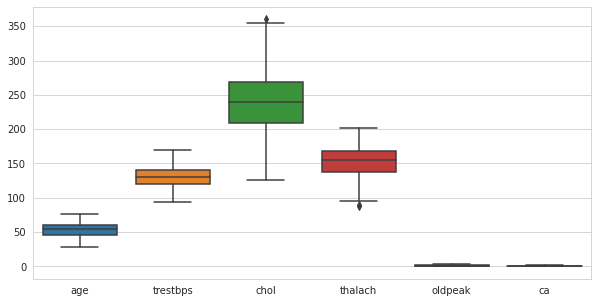

In [33]:
# menampilkan boxplot dari fitur-fitur numerik untuk mengecek outlier
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.boxplot(data=data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']])

<Axes: xlabel='target', ylabel='count'>

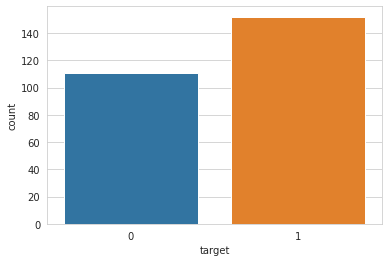

In [34]:
# Menampilkan jumlah data per target class 
sns.set_style('whitegrid')
sns.countplot(x=data['target'])

Dari countplot diatas terlihat bahwa data imbalance dimana banyaknya pasien dengan fitur target 1 (memiliki penyakit jantung) lebih banyak dibandingkan banyaknya pasien dengan fitur target 0 (tidak memiliki penyakit jantung)

In [35]:
# Descriptive statistics of the dataset
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,53.768061,0.684411,1.000000,129.467681,241.779468,0.129278,0.532319,150.874525,0.315589,0.952091,1.433460,0.505703,2.281369,0.577947
std,9.010776,0.465636,1.037466,15.390028,44.323981,0.336147,0.514949,22.587477,0.465636,1.036318,0.607163,0.719790,0.609025,0.494829
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,0.000000,0.000000,120.000000,209.000000,0.000000,0.000000,137.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,155.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,269.000000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,76.000000,1.000000,3.000000,170.000000,360.000000,1.000000,2.000000,202.000000,1.000000,4.000000,2.000000,2.000000,3.000000,1.000000


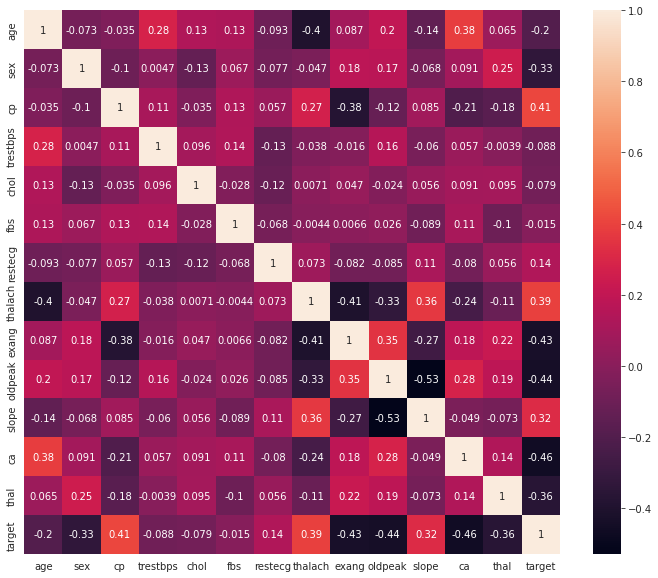

In [36]:
# Menampilkan heatmap korelasi antar fitur
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

#Feature Engineering

In [37]:
# Feature engineering dengan one-hot encoding: mengubah categorical variables menjadi dummy variables
cp = pd.get_dummies(data['cp'], prefix="cp")
thal = pd.get_dummies(data['thal'], prefix="thal")
slope = pd.get_dummies(data['slope'], prefix="slope")

In [38]:
data_ = [data, cp, thal, slope]
data = pd.concat(data_, axis=1)
data = data.drop(columns=['cp', 'thal', 'slope'])
data

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,...,0,0,0,0,0,0,1,0,0,1
1,53,1,140,203,1,0,155,1,3.1,0,...,0,0,0,0,0,0,1,1,0,0
2,70,1,145,174,0,1,125,1,2.6,0,...,0,0,0,0,0,0,1,1,0,0
3,61,1,148,203,0,1,161,0,0.0,1,...,0,0,0,0,0,0,1,0,0,1
5,58,0,100,248,0,0,122,0,1.0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,120,211,0,0,115,0,1.5,0,...,0,1,0,0,0,1,0,0,1,0
733,44,0,108,141,0,1,175,0,0.6,0,...,0,1,0,0,0,1,0,0,1,0
739,52,1,128,255,0,1,161,1,0.0,1,...,0,0,0,0,0,0,1,0,0,1
843,59,1,160,273,0,0,125,0,0.0,0,...,0,0,1,0,0,1,0,0,0,1


#Automate EDA through Dataprep

In [40]:
from dataprep.datasets import load_dataset
from dataprep.eda import create_report
create_report(data).show() 

Output hidden; open in https://colab.research.google.com to view.

Dari EDA yang telah dilakukan dapat diketahui bahwa fitur thal (detak jantung maksimum yang tercapai) dan fitur slope (kemiringan segmen ST saat puncak olahraga) merupakan fitur yang paling berpengaruh terhadap penggolongan apakah pasien memiliki penyakit jantung atau tidak (fitur target). Dan juga terlihat bahwa data imbalance dimana banyaknya pasien dengan fitur target 1 (memiliki penyakit jantung) lebih banyak dibandingkan banyaknya pasien dengan fitur target 0 (tidak memiliki penyakit jantung)